## 1. Loading Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load training data
reddit_df = pd.read_csv('train.csv')

In [3]:
reddit_df.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [5]:
# Total no of ques
reddit_df.shape[0]

1306122

In [6]:
# Random question
reddit_df['question_text'][1]

'Do you have an adopted dog, how would you encourage people to adopt and not shop?'

In [7]:
reddit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   qid            1306122 non-null  object
 1   question_text  1306122 non-null  object
 2   target         1306122 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 29.9+ MB


The train data have 2 text columns (*qid* and *question_text*) and 1 integer column (*target*):
* The *qid* column contains the id of the questions.
* The *question_text* column contains the content of the questions.
* The *target* column contains question type (0 indicates insincere, 1 indicates sincere)

In [8]:
reddit_df['question_text'].isnull().sum()
reddit_df['question_text'].isna().sum()

0

There are no null and na values in the reddit dataset.

In [11]:
# Printing last 5 insincere questions
pd.set_option('display.max_columns', None)
insincere_qes = reddit_df[reddit_df['target'] == 1]
print(insincere_qes[-5:].question_text.to_string())

1306093    How is it to have intimate relation with your ...
1306094    Why is it when singers have lyrics about voice...
1306099                    Do pakis smell of curry and shit?
1306103    Isn't Trump right after all? Why should the US...
1306112                  Are you ashamed of being an Indian?


In [12]:
# Printing last 5 sincere questions
pd.set_option('display.max_columns', None)
sincere_qes = reddit_df[reddit_df['target'] == 0]
print(sincere_qes[-5:].question_text)

1306117    What other technical skills do you need as a c...
1306118    Does MS in ECE have good job prospects in USA ...
1306119                            Is foam insulation toxic?
1306120    How can one start a research project based on ...
1306121    Who wins in a battle between a Wolverine and a...
Name: question_text, dtype: object


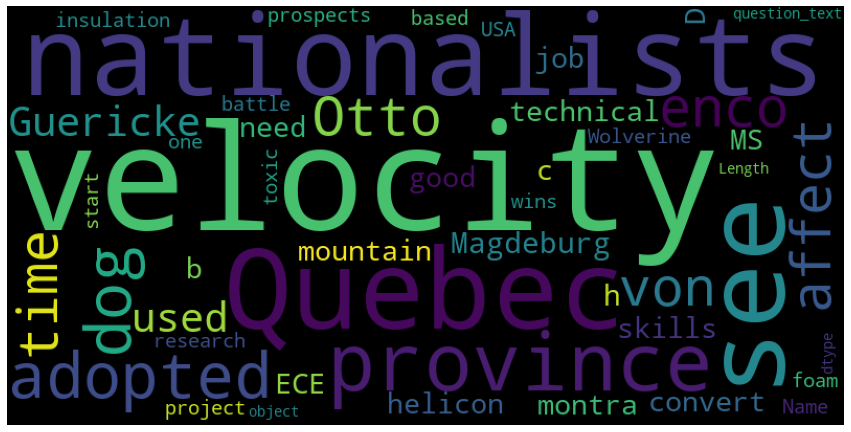

In [23]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color ='black', min_font_size = 11).generate(str(reddit_df["question_text"]))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

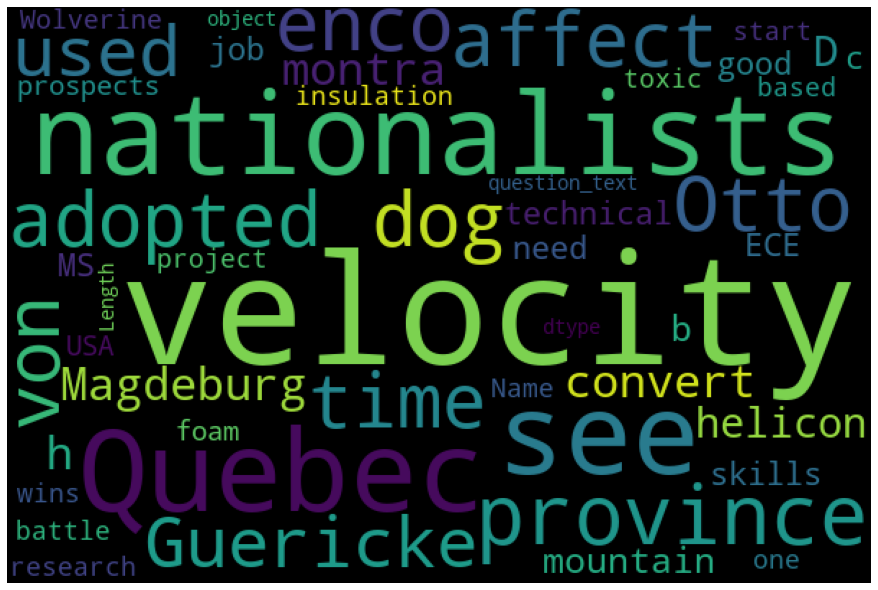

In [27]:
#Positive Word cloud
sincere_wc = WordCloud(width=600, height=400, background_color ='black', min_font_size = 10).generate(str(reddit_df[reddit_df["target"] == 0]["question_text"]))
plt.figure(figsize=(15,8))
plt.imshow(sincere_wc)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show();

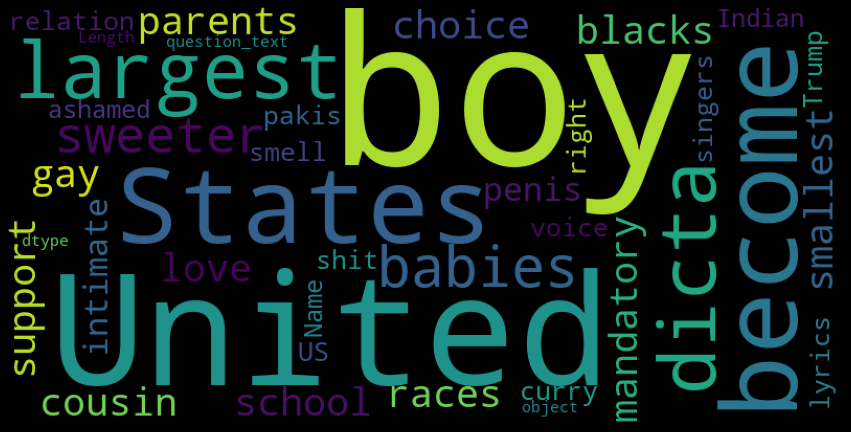

In [26]:
# Negative word cloud
insincere_wc = WordCloud(width=800, height=400, background_color ='black', min_font_size = 10).generate(str(reddit_df[reddit_df["target"] == 1]["question_text"]))
plt.figure(figsize=(15,8), facecolor='black')
plt.imshow(insincere_wc)
plt.axis("off")
plt.show();

### **2. Feature engineering**

In [28]:
reddit_df.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [41]:
import string
from nltk.corpus import stopwords

# shortened dictionary
shortened_dict = {"dont": "do not", "aint": "is not", "isnt": "is not", "doesnt": "does not", "cant": "cannot", "mustnt": "must not", "hasnt": "has not", "havent": "have not", "arent": "are not", "ain't": "is not", "aren't": "are not","can't": "cannot", "‘cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "Iam": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will", "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

# stop words
stop_words = stopwords.words('english')
stop_words.remove('not')

# puntuation list
punctuation = string.punctuation 

In [42]:
def add_features(df):
    df["length"] = df["question_text"].apply(lambda x: len(str(x)))
    df["words_no"] = df["question_text"].apply(lambda x: len(x.split()))
    df["unique_words_no"] = df["question_text"].apply(lambda x: len(set(str(x).split())))
    df["stopwords_no"] = df["question_text"].apply(lambda x : len([nw for nw in str(x).split() if nw.lower() in stop_words]))
    df["punctuation_no"] = df["question_text"].apply(lambda x : len([np for np in str(x) if np in punctuation]))
    df["uppercase_no"] = df["question_text"].apply(lambda x : len([nu for nu in str(x).split() if nu.isupper()]))
    df["lowercase_no"] = df["question_text"].apply(lambda x : len([nl for nl in str(x).split() if nl.islower()]))
    return df

In [43]:
reddit_df = add_features(reddit_df)

#### The statistics of insincere questions

In [44]:
pd.set_option('display.float_format', lambda st:'%.2f' % st)
reddit_df[reddit_df['target'] == 0].describe()

,target,length,no_words,no_unique_words,no_stopwords,no_punctuation,no_uppercase,no_lowercase,words_no,unique_words_no,stopwords_no,punctuation_no,uppercase_no,lowercase_no
count,1225312.00,1225312.00,1225312.00,1225312.00,1225312.00,1225312.00,1225312.00,1225312.00,1225312.00,1225312.00,1225312.00,1225312.00,1225312.00,1225312.00
mean,0.00,68.87,12.51,11.88,6.01,1.71,0.46,10.03,12.51,11.88,6.01,1.71,0.46,10.03
std,0.00,36.74,6.75,5.78,3.58,1.55,0.85,6.17,6.75,5.78,3.58,1.55,0.85,6.17
min,0.00,5.00,2.00,2.00,0.00,0.00,0.00,0.00,2.00,2.00,0.00,0.00,0.00,0.00
25%,0.00,44.00,8.00,8.00,4.00,1.00,0.00,6.00,8.00,8.00,4.00,1.00,0.00,6.00
50%,0.00,59.00,11.00,10.00,5.00,1.00,0.00,8.00,11.00,10.00,5.00,1.00,0.00,8.00
75%,0.00,83.00,15.00,14.00,7.00,2.00,1.00,12.00,15.00,14.00,7.00,2.00,1.00,12.00
max,0.00,752.00,134.00,96.00,56.00,158.00,25.00,112.00,134.00,96.00,56.00,158.00,25.00,112.00


#### The statistics of sincere questions

In [45]:
pd.set_option('display.float_format', lambda st:'%.2f' % st)
reddit_df[reddit_df['target'] == 1].describe()

,target,length,no_words,no_unique_words,no_stopwords,no_punctuation,no_uppercase,no_lowercase,words_no,unique_words_no,stopwords_no,punctuation_no,uppercase_no,lowercase_no
count,80810.00,80810.00,80810.00,80810.00,80810.00,80810.00,80810.00,80810.00,80810.00,80810.00,80810.00,80810.00,80810.00,80810.00
mean,1.00,98.06,17.28,16.04,7.92,2.37,0.33,13.92,17.28,16.04,7.92,2.37,0.33,13.92
std,0.00,55.19,9.57,8.15,4.86,2.91,0.90,8.66,9.57,8.15,4.86,2.91,0.90,8.66
min,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00
25%,1.00,55.00,10.00,10.00,4.00,1.00,0.00,7.00,10.00,10.00,4.00,1.00,0.00,7.00
50%,1.00,86.00,15.00,14.00,7.00,2.00,0.00,12.00,15.00,14.00,7.00,2.00,0.00,12.00
75%,1.00,130.00,23.00,21.00,11.00,3.00,0.00,19.00,23.00,21.00,11.00,3.00,0.00,19.00
max,1.00,1017.00,64.00,48.00,37.00,411.00,37.00,56.00,64.00,48.00,37.00,411.00,37.00,56.00


#### Pair plot

<Figure size 1080x1080 with 0 Axes>

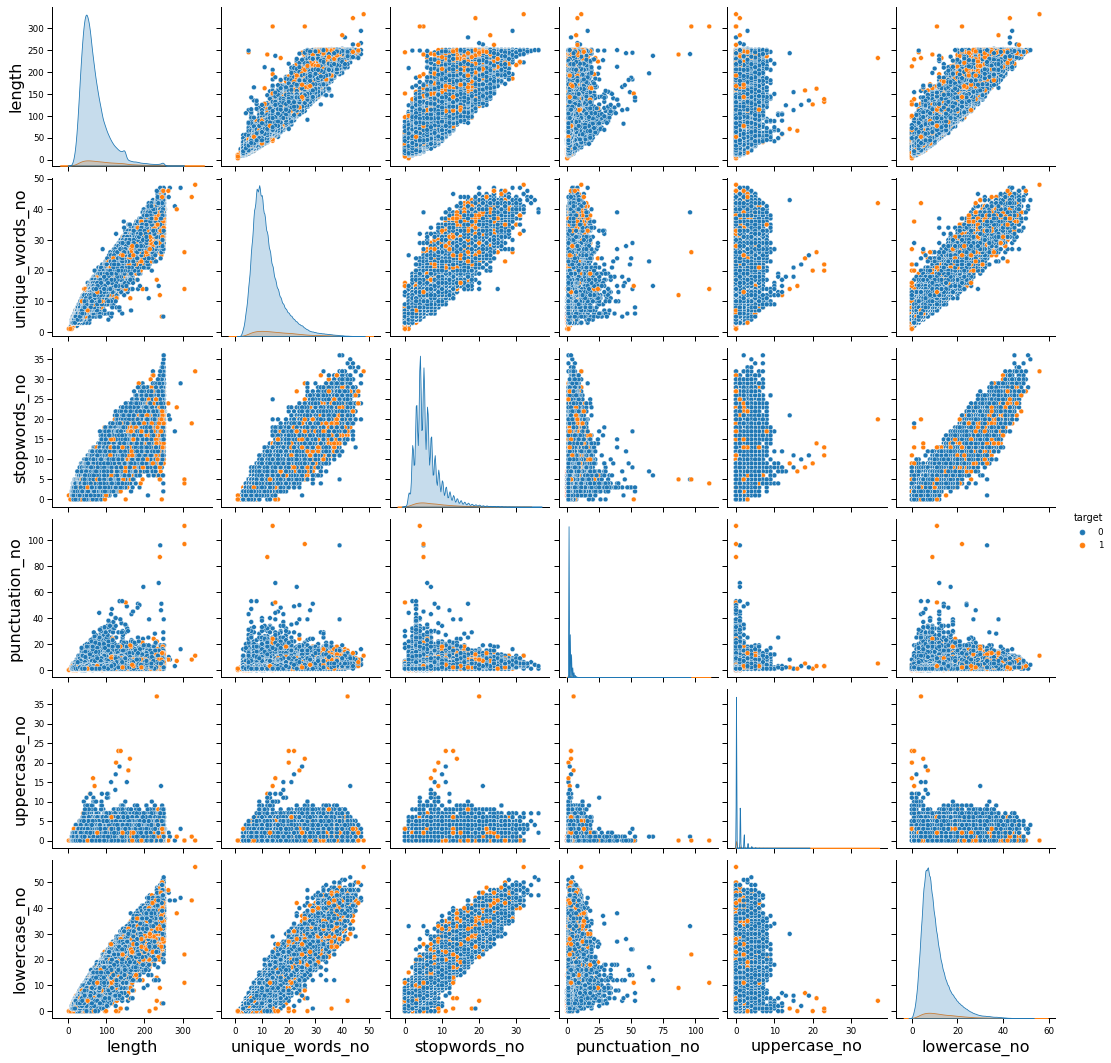

In [46]:
features = ['length', 'unique_words_no', 'stopwords_no','punctuation_no', 'uppercase_no', 'lowercase_no', 'target']

sample_df = reddit_df[features].sample(n=round(reddit_df.shape[0]/5), random_state=23)

plt.figure(figsize=(15,15))
sns.set_context("paper", rc={"axes.labelsize":16})
sns.pairplot(data=sample_df, hue='target')
plt.show()

#### The distribution of the questions's number of words.

In [47]:
reddit_df['words_no']

0          13
1          16
2          10
3           9
4          15
           ..
1306117    17
1306118    19
1306119     4
1306120    13
1306121    11
Name: words_no, Length: 1306122, dtype: int64

Text(0.5, 1.0, 'Distribution plot of number of words')

<Figure size 720x720 with 0 Axes>

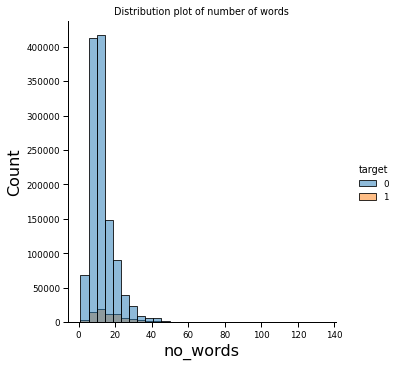

In [48]:
plt.figure(figsize=(10, 10))
sns.displot(reddit_df, x='no_words', hue='target', kind='hist', bins=30)
plt.title("Distribution plot of number of words")

- Both Insincere and Sincere questions have the same distribution.
- In general, insincere questions tend to be much shorter than sincere questions.

#### HeatMap

In [57]:
correlation = reddit_df.corr()['target'][1:]

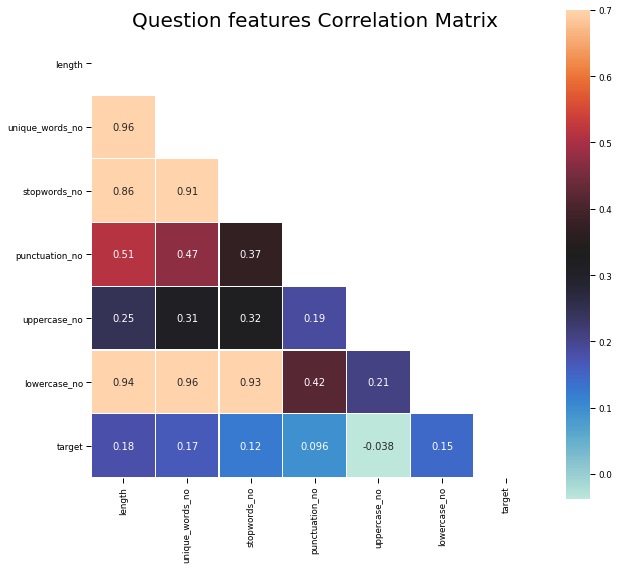

In [58]:
mask = np.zeros_like(reddit_df[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(10, 10))
plt.title('Question features Correlation Matrix',fontsize=20)

_ = sns.heatmap(reddit_df[features].corr(),square=True, linewidths=0.25,vmax=0.7,cmap="icefire", linecolor='w', annot=True, annot_kws={"size":10},mask=mask, cbar_kws={"shrink": .9});

#### Illustration of target correlation

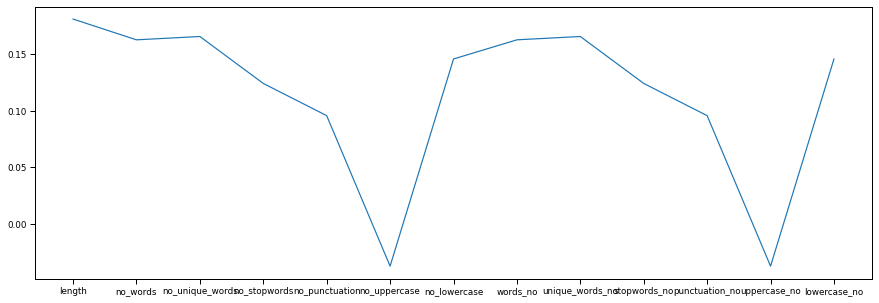

In [59]:
plt.figure(figsize=(15, 5))

target_cor = reddit_df.corr()['target'][1:]
plt.plot(target_cor)

- The length of the question differentiates its type best, but the coefficient is not too much (only 0.18).
- In conclusion, all the features correlates with the target, but not in a sufficient ratio.

## **Data Preprocessing**

In [60]:
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
import warnings
warnings.filterwarnings("ignore")

In [61]:
lemmatizer = WordNetLemmatizer()
stemmer = SnowballStemmer('english')

In [62]:
def text_preprocessing(qes):
    # Data cleaning:
    qes = re.sub(re.compile('<.*?>'), '', qes)
    qes = re.sub('[^A-Za-z0-9]+', ' ', qes)

    # Lowercase:
    qes = qes.lower()

    # Tokenization:
    tokens = word_tokenize(qes)

    # Contractions replacement:
    tokens = [shortened_dict.get(token) if (shortened_dict.get(token) != None) else token for token in tokens]

    # Stop words removal:
    tokens = [w for w in tokens if w not in stop_words]

    # Stemming:
    tokens = [stemmer.stem(token) for token in tokens]
    
    # Lemmatization:
    tokens = [lemmatizer.lemmatize(w) for w in tokens]

    # Join words after preprocessed:
    qes = ' '.join(tokens) 

    return qes

reddit_df['preprocessed_que'] = reddit_df['question_text'].apply(text_preprocessing)

## **Train model**

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, confusion_matrix, classification_report, accuracy_score


In [66]:
X = reddit_df['preprocessed_questions']
y = reddit_df.target

### Model 1: MultinomialNB

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.15, random_state = 21)

#### I. BOW

In [38]:
nb_bow = Pipeline([("cv", CountVectorizer(analyzer="word", ngram_range=(2,4), max_df=0.85)), ("model", MultinomialNB())])
nb_bow.fit(X_train, y_train)

Pipeline(steps=[('cv', CountVectorizer(max_df=0.85, ngram_range=(2, 4))),
                ('model', MultinomialNB())])

In [40]:
y_pred = nb_bow.predict(X_test)

In [44]:
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))

Accuracy Score: 0.9459827785972774
F1 Score: 0.3306558724938334


In [43]:
import pickle
pickle.dump(nb_bow, open('MultinomialNB_bow.sav', 'wb'))

#### II. TF-IDF

In [45]:
nb_tdf = Pipeline([("tfid", TfidfVectorizer(lowercase=False, min_df=0.01, max_df=0.95)), ("model", MultinomialNB())])
nb_tdf.fit(X_train, y_train)
y_pred = nb_tdf.predict(X_test)

In [46]:
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))

Accuracy Score: 0.9385817608297307
F1 Score: 0.0011621150493898896


In [53]:
pickle.dump(nb_tdf, open('MultinomialNB_tdf.sav', 'wb'))

### Model 2: Logistic Regression

#### I. BOW

In [49]:
lr_bow = Pipeline([("cv", CountVectorizer(analyzer="word", ngram_range=(1,4), max_df=0.9)),
                     ("model", LogisticRegression(solver="saga", class_weight="balanced", C=0.45, max_iter=250, verbose=1, n_jobs=-1))
                           ])
lr_bow.fit(X_train, y_train)
y_pred = lr_bow.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


max_iter reached after 499 seconds


C:\Users\iadit\anaconda3\envs\dm\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  8.3min finished


In [50]:
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
pickle.dump(lr_bow, open('LR_bow.sav', 'wb'))

Accuracy Score: 0.9440942430290069
F1 Score: 0.6056525652565257


#### II. TF-IDF

In [51]:
lr_tdf = Pipeline([("tfid", TfidfVectorizer(lowercase=False, min_df=0.01, max_df=0.95)),
                     ("model", LogisticRegression(solver="saga", class_weight="balanced", C=0.45, max_iter=250, verbose=1, n_jobs=-1))
                           ])
lr_tdf.fit(X_train, y_train)
y_pred = lr_tdf.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


max_iter reached after 116 seconds


C:\Users\iadit\anaconda3\envs\dm\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.9min finished


In [52]:
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
pickle.dump(lr_tdf, open('LR_tdf.sav', 'wb'))

Accuracy Score: 0.8469571608675014
F1 Score: 0.28026884301488236
